In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

### writing algo code

In [2]:
x=np.array([12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72])
y=np.array([39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24])


In [3]:
def init_centroid(k):
    centroid=[[random.randint(0,72),random.randint(0,70)] for i in range(k)]
    return centroid 

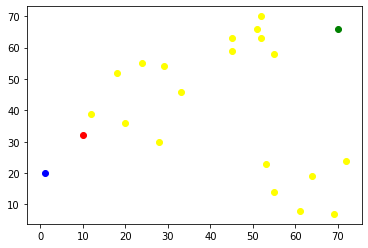

In [4]:
### visualizing
centroid=init_centroid(3)
color_list=np.array(["red","green","blue"])
plt.scatter(x,y,color="yellow")
for i in range(len(centroid)): 
    plt.scatter(*centroid[i],c=color_list[i]) 
plt.show()

In [5]:
centroid

[[10, 32], [70, 66], [1, 20]]

In [6]:
df=pd.DataFrame({"X":x,"Y":y})

In [7]:
def assign(df,centroid):
   ###updating the distance from classifier
    for i in range(len(centroid)):
        df["distance_from_{}".format(i)]=np.sqrt((x-centroid[i][0])**2+(y-centroid[i][1])**2)
    
    ####finding min distance
    
    columns=["distance_from_{}".format(i) for i in range(len(centroid))]
    df["closet_k"]=df.loc[:,columns].idxmin(axis=1)
    df["closet_k"]=df["closet_k"].str[-1]
    df["closet_k"]=df["closet_k"].astype("int")
    ###giving same color as classifier
    df["color"]=color_list[df["closet_k"]]
    return df



In [8]:
centroid=init_centroid(3)
df=assign(df,centroid)
df

,X,Y,distance_from_0,distance_from_1,distance_from_2,closet_k,color
0,12,39,60.415230,8.062258,36.400549,1,green
1,20,36,55.217751,15.620499,32.649655,1,green
2,28,30,53.037722,25.612497,33.615473,1,green
3,18,52,49.648766,11.661904,24.698178,1,green
4,29,54,38.626416,22.472205,13.892444,2,blue
5,33,46,38.832976,25.000000,17.000000,2,blue
6,24,55,43.011626,18.357560,18.027756,2,blue
7,45,59,21.931712,39.217343,4.472136,2,blue
8,45,63,20.615528,40.718546,4.472136,2,blue
9,52,70,13.152946,50.119856,14.212670,0,red


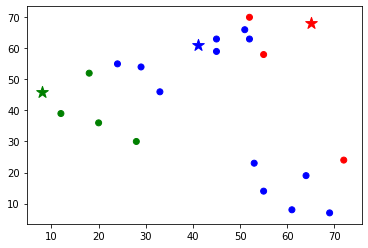

In [9]:
###  * denote classifier point
for i in range(len(centroid)): 
    plt.scatter(*centroid[i],c=color_list[i],marker="*",s=150) 
plt.scatter(df.X,df.Y,c=df.color)
plt.show()

In [10]:
import copy

In [11]:
old_centroid = copy.deepcopy(centroid)
old_centroid

[[65, 68], [8, 46], [41, 61]]

In [12]:
##update the centroid (by taking mean of presiou classsified point)
def update(t):
    for i in range(len(t)):
        t[i][0]=np.mean(df[df["closet_k"]==i].X)
        t[i][1]=np.mean(df[df["closet_k"]==i].Y)
    return t
    

In [13]:
centroid=update(centroid)
centroid

[[59.666666666666664, 50.666666666666664],
 [19.5, 39.25],
 [48.416666666666664, 39.75]]

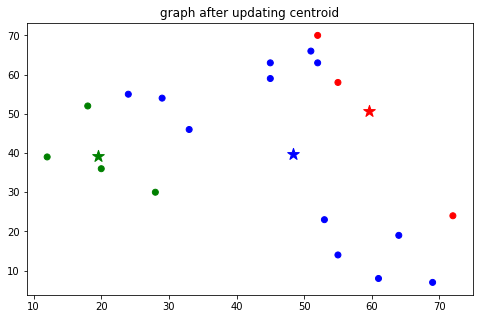

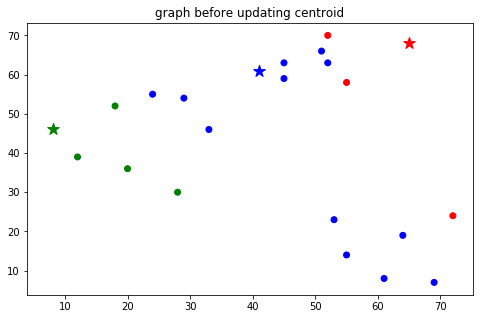

In [14]:
plt.figure(figsize=(8,5))
plt.title("graph after updating centroid")
plt.scatter(df.X,df.Y,c=df.color)
for i in range(len(centroid)): 
    plt.scatter(*centroid[i],c=color_list[i],s=150,marker="*") 
plt.show()

plt.figure(figsize=(8,5))
plt.title("graph before updating centroid")
plt.scatter(df.X,df.Y,c=df.color)
for i in range(len(old_centroid)): 
    plt.scatter(*old_centroid[i],c=color_list[i],s=150,marker="*") 
plt.show()

#### repeat the assigning and updating process till we get sam result

In [15]:

while True:
    closet_k_old=copy.deepcopy(df["closet_k"])
    centroid=update(centroid)
    df=assign(df,centroid)
    print("updated=",centroid)
 
    if closet_k_old.equals(df["closet_k"]):
        break

updated= [[59.666666666666664, 50.666666666666664], [19.5, 39.25], [48.416666666666664, 39.75]]
updated= [[50.0, 63.166666666666664], [23.428571428571427, 44.57142857142857], [62.333333333333336, 15.833333333333334]]


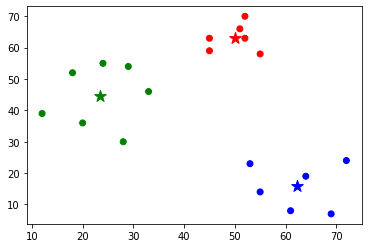

In [16]:
plt.scatter(df.X,df.Y,c=df.color)
for i in range(len(centroid)): 
    plt.scatter(*centroid[i],c=color_list[i],s=150,marker="*") 
plt.show()

In [17]:
#### now we got our classifier model